In [1]:
# Import the machine learning libraries.
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

#One-to-One Sequence Problems

###One-to-One Sequence Problems with a Single Feature

Creating the Dataset

In [2]:
X = list()
Y = list()
data_length = 30
X = [x+1 for x in range(data_length)]
Y = [y * 15 for y in X]

print(X)
print(Y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450]


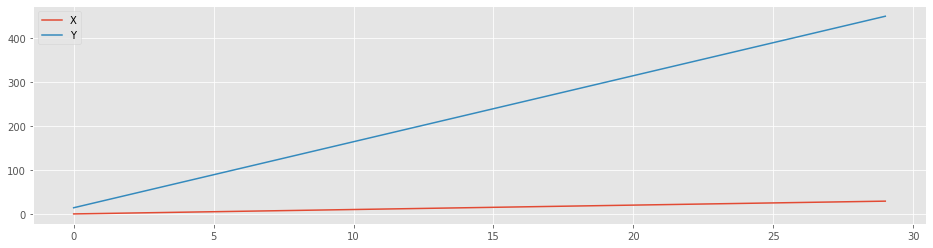

In [3]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 4))
plt.plot(X, label="X")
plt.plot(Y, label="Y")
plt.legend()

In [4]:
print(type(X), type(Y))

<class 'list'> <class 'list'>


In [5]:
Y = np.asarray(Y)

In [6]:
print(type(X), type(Y))

<class 'list'> <class 'numpy.ndarray'>


In [7]:
X = array(X).reshape(data_length, 1, 1)
print(X.shape)

(30, 1, 1)


Solution via Simple LSTM

In [8]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False, batch_size=5)

dict_keys(['loss', 'val_loss'])


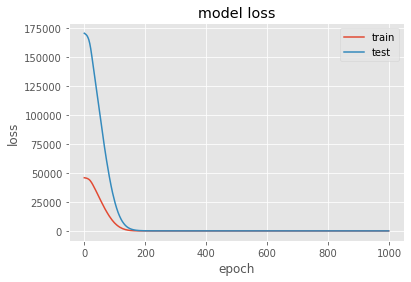

In [10]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [11]:
test_input = array([50])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[731.0718]]


Solution via Stacked LSTM

In [12]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
history = model.fit(X, Y, epochs=2000, validation_split=0.2, verbose=False, batch_size=5)

dict_keys(['loss', 'val_loss'])


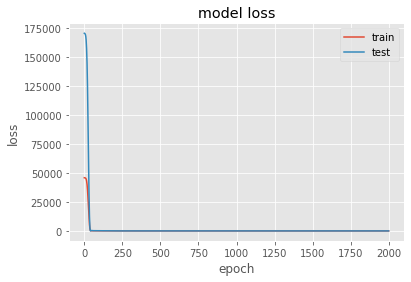

In [14]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [15]:
test_input = array([50])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[745.9593]]


###One-to-One Sequence Problems with Multiple Features

Creating the Dataset

In [16]:
nums = 25

X1 = list()
X2 = list()
X = list()
Y = list()

X1 = [(x+1)*2 for x in range(25)]
X2 = [(x+1)*3 for x in range(25)]
Y = [x1*x2 for x1,x2 in zip(X1,X2)]
Y = np.asarray(Y)

print(X1)
print(X2)
print(Y)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75]
[   6   24   54   96  150  216  294  384  486  600  726  864 1014 1176
 1350 1536 1734 1944 2166 2400 2646 2904 3174 3456 3750]


In [17]:
X = np.column_stack((X1, X2))
print(X)

[[ 2  3]
 [ 4  6]
 [ 6  9]
 [ 8 12]
 [10 15]
 [12 18]
 [14 21]
 [16 24]
 [18 27]
 [20 30]
 [22 33]
 [24 36]
 [26 39]
 [28 42]
 [30 45]
 [32 48]
 [34 51]
 [36 54]
 [38 57]
 [40 60]
 [42 63]
 [44 66]
 [46 69]
 [48 72]
 [50 75]]


In [18]:
X = array(X).reshape(25, 1, 2)

Solution via Simple LSTM

In [19]:
model = Sequential()
model.add(LSTM(80, activation='relu', input_shape=(1, 2)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 80)                26560     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                810       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 27,381
Trainable params: 27,381
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
model.fit(X, Y, epochs=2000, validation_split=0.2, verbose=False, batch_size=5)

In [21]:
test_input = array([55,80])
test_input = test_input.reshape((1, 1, 2))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[3986.4072]]


Solution via Stacked LSTM

In [22]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(1, 2)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 200)            162400    
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 100)            120400    
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 50)             30200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [23]:
history = model.fit(X, Y, epochs=1000, validation_split=0.1, verbose=False, batch_size=3)

dict_keys(['loss', 'val_loss'])


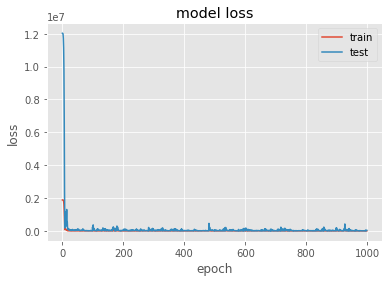

In [24]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [25]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[3939.2937]]


#Many-to-One Sequence Problems

###Many-to-One Sequence Problems with a Single Feature

Creating the Dataset

In [26]:
X = np.array([x+1 for x in range(45)])
print(X)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [27]:
X = X.reshape(15,3,1)
print(X)

[[[ 1]
  [ 2]
  [ 3]]

 [[ 4]
  [ 5]
  [ 6]]

 [[ 7]
  [ 8]
  [ 9]]

 [[10]
  [11]
  [12]]

 [[13]
  [14]
  [15]]

 [[16]
  [17]
  [18]]

 [[19]
  [20]
  [21]]

 [[22]
  [23]
  [24]]

 [[25]
  [26]
  [27]]

 [[28]
  [29]
  [30]]

 [[31]
  [32]
  [33]]

 [[34]
  [35]
  [36]]

 [[37]
  [38]
  [39]]

 [[40]
  [41]
  [42]]

 [[43]
  [44]
  [45]]]


In [28]:
Y = list()
for x in X:
    Y.append(x.sum())

Y = np.array(Y)
print(Y)

[  6  15  24  33  42  51  60  69  78  87  96 105 114 123 132]


Solution via Simple LSTM

In [29]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [30]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False)

dict_keys(['loss', 'val_loss'])


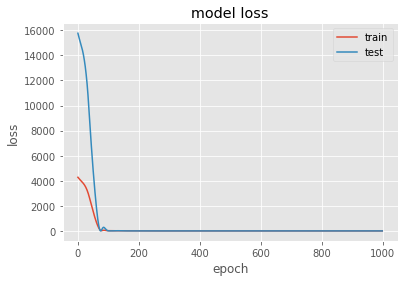

In [31]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [32]:
test_input = array([50,51,52])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[152.76772]]


Solution via Stacked LSTM

In [33]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(3, 1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [34]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False)

dict_keys(['loss', 'val_loss'])


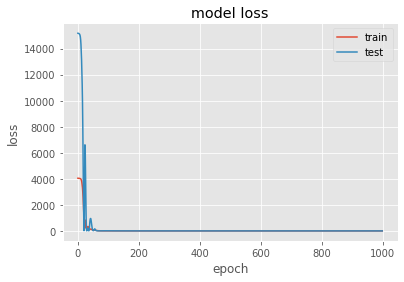

In [35]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [36]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[150.89131]]


Solution via Bidirectional LSTM

In [37]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [38]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False)

dict_keys(['loss', 'val_loss'])


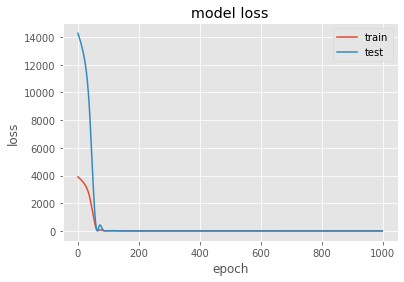

In [39]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [40]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[153.22887]]


###Many-to-one Sequence Problems with Multiple Features

Creating the Dataset

In [41]:
X1 = np.array([x+3 for x in range(0, 135, 3)])
print(X1)

X2 = np.array([x+5 for x in range(0, 225, 5)])
print(X2)

[  3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54
  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105 108
 111 114 117 120 123 126 129 132 135]
[  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180
 185 190 195 200 205 210 215 220 225]


In [42]:
X = np.column_stack((X1, X2))
print(X)

[[  3   5]
 [  6  10]
 [  9  15]
 [ 12  20]
 [ 15  25]
 [ 18  30]
 [ 21  35]
 [ 24  40]
 [ 27  45]
 [ 30  50]
 [ 33  55]
 [ 36  60]
 [ 39  65]
 [ 42  70]
 [ 45  75]
 [ 48  80]
 [ 51  85]
 [ 54  90]
 [ 57  95]
 [ 60 100]
 [ 63 105]
 [ 66 110]
 [ 69 115]
 [ 72 120]
 [ 75 125]
 [ 78 130]
 [ 81 135]
 [ 84 140]
 [ 87 145]
 [ 90 150]
 [ 93 155]
 [ 96 160]
 [ 99 165]
 [102 170]
 [105 175]
 [108 180]
 [111 185]
 [114 190]
 [117 195]
 [120 200]
 [123 205]
 [126 210]
 [129 215]
 [132 220]
 [135 225]]


In [43]:
X = array(X).reshape(15, 3, 2)
print(X)

[[[  3   5]
  [  6  10]
  [  9  15]]

 [[ 12  20]
  [ 15  25]
  [ 18  30]]

 [[ 21  35]
  [ 24  40]
  [ 27  45]]

 [[ 30  50]
  [ 33  55]
  [ 36  60]]

 [[ 39  65]
  [ 42  70]
  [ 45  75]]

 [[ 48  80]
  [ 51  85]
  [ 54  90]]

 [[ 57  95]
  [ 60 100]
  [ 63 105]]

 [[ 66 110]
  [ 69 115]
  [ 72 120]]

 [[ 75 125]
  [ 78 130]
  [ 81 135]]

 [[ 84 140]
  [ 87 145]
  [ 90 150]]

 [[ 93 155]
  [ 96 160]
  [ 99 165]]

 [[102 170]
  [105 175]
  [108 180]]

 [[111 185]
  [114 190]
  [117 195]]

 [[120 200]
  [123 205]
  [126 210]]

 [[129 215]
  [132 220]
  [135 225]]]


Solution via Simple LSTM

In [44]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 2)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [45]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False)

dict_keys(['loss', 'val_loss'])


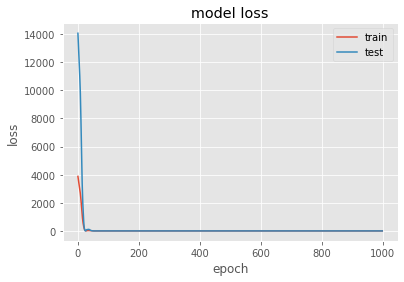

In [46]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [47]:
test_input = array([[8, 51],
                    [11,56],
                    [14,61]])

test_input = test_input.reshape((1, 3, 2))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[15.74945]]


Solution via Stacked LSTM

In [48]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(3, 2)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [49]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False)

dict_keys(['loss', 'val_loss'])


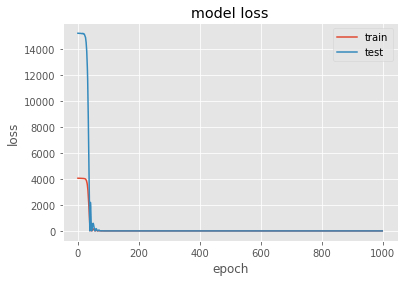

In [50]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [51]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[26.027208]]


Solution via Bidirectional LSTM

In [52]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(3, 2)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [53]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False)

dict_keys(['loss', 'val_loss'])


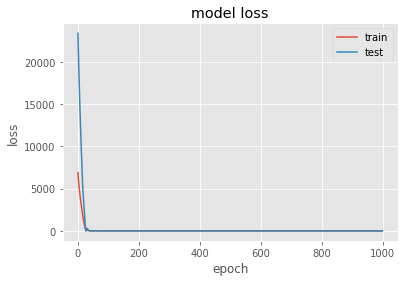

In [54]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [55]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[12.123985]]


In [56]:
Y = list()
for x in X:
    new_item = list()
    new_item.append(x[2][0]+3)
    new_item.append(x[2][1]+5)
    Y.append(new_item)

Y = np.array(Y)
print(Y)

[[ 12  20]
 [ 21  35]
 [ 30  50]
 [ 39  65]
 [ 48  80]
 [ 57  95]
 [ 66 110]
 [ 75 125]
 [ 84 140]
 [ 93 155]
 [102 170]
 [111 185]
 [120 200]
 [129 215]
 [138 230]]


In [57]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 2)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

In [58]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False)

dict_keys(['loss', 'val_loss'])


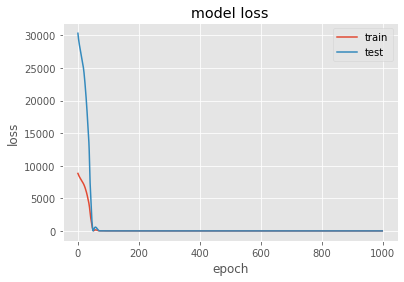

In [59]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [60]:
test_input = array([[20,34],
                    [23,39],
                    [26,44]])

test_input = test_input.reshape((1, 3, 2))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[29.255377 48.74049 ]]


In [61]:
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(3, 2)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

In [62]:
history = model.fit(X, Y, epochs=500, validation_split=0.2, verbose=False)

dict_keys(['loss', 'val_loss'])


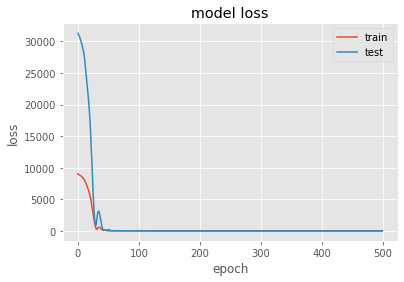

In [63]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [64]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[29.152    48.561626]]


In [65]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(3, 2)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

In [66]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False)

dict_keys(['loss', 'val_loss'])


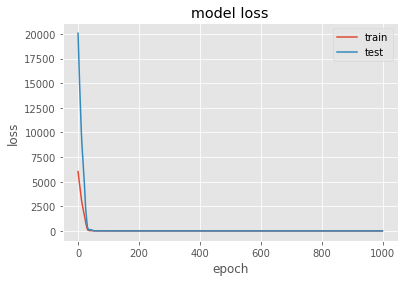

In [67]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [68]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[29.375978 48.919857]]
